# Appendix

## 1 - City Centre Distance and Price

In this section, I am exploring one question, the relationship between distance from Seattle city centre, and the price. We have lattitude - longitude variables, but the method to calculate distance in kms from these is not straightforward. We are importing a package for this calculation. 

In [82]:
# importing necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [2]:
# creating dataframe by loading from .csv file
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [77]:
# importing the geodesic package now
# in order to run the next section, you need geopy on your computer:
# $ pip install geopy

from geopy.distance import geodesic 

# testing here if function works

# Loading the lat-long data for Kolkata & Delhi 
kolkata = (22.5726, 88.3639) 
delhi = (28.7041, 77.1025) 
  
# Print the distance calculated in km 
print(geodesic(kolkata, delhi).km) 

# The driving distance between New Delhi and Kolkata is 1462 km, 
# while the aerial distance from New Delhi to Kolkata is 1305 km.

# looks OK

1318.13891581683


In [4]:
def calc_dist(row, dist_from_latt, dist_from_long):
    """
    Formula that returns the distance in kms from a given latt - long pair. 
    Assumes that the row we are passing has a 'lat' and a 'long' column. 
    """
    
    distance = geodesic(
        (dist_from_latt,dist_from_long), \
        (row['lat'],row['long'])
    ).km
    return distance 

In [7]:
# seattle center, from google search
seattle_center_latt = 47.6062
seattle_center_long = -122.3321

In [9]:
# creating a new column where every value is calculated from latt and long, distance from seattle_center
data['distance_from_center'] = data.apply(lambda row: calc_dist(
    row, seattle_center_latt, seattle_center_long
), axis = 1)

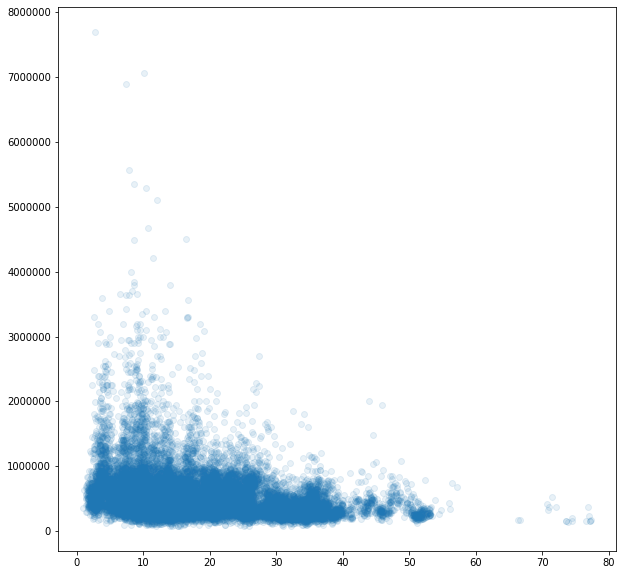

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(x = data['distance_from_center'], y = data['price'], alpha = 0.1)

In [12]:
#transforming price into log scale
data['price_log'] = np.log(data['price'])

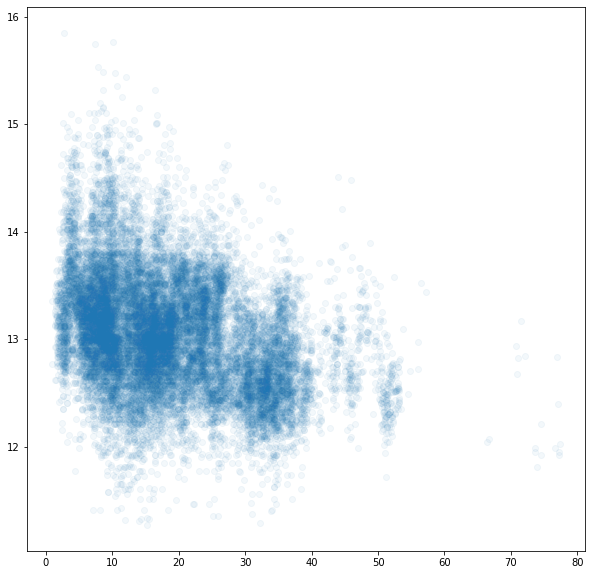

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(x = data['distance_from_center'], y = data['price_log'], alpha = 0.05)

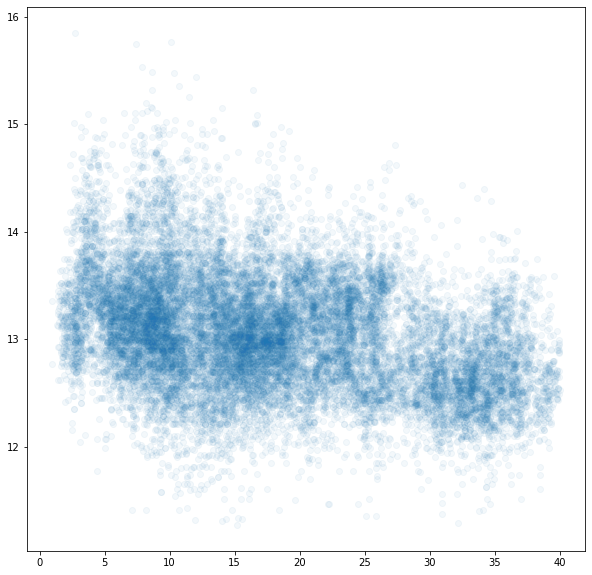

In [17]:
# concentrating on houses < 40 km
data_filtered = data[data['distance_from_center'] < 40]

plt.figure(figsize=(10,10))
plt.scatter(x = data_filtered['distance_from_center'], y = data_filtered['price_log'], alpha = 0.05)

In [76]:
# amazon sphere location
amazon_hq_latt = 47.3656
amazon_hq_long = -122.2022

In [24]:
data['distance_from_amazon'] = data.apply(lambda row: calc_dist(
    row, amazon_hq_latt, amazon_hq_long
), axis = 1)

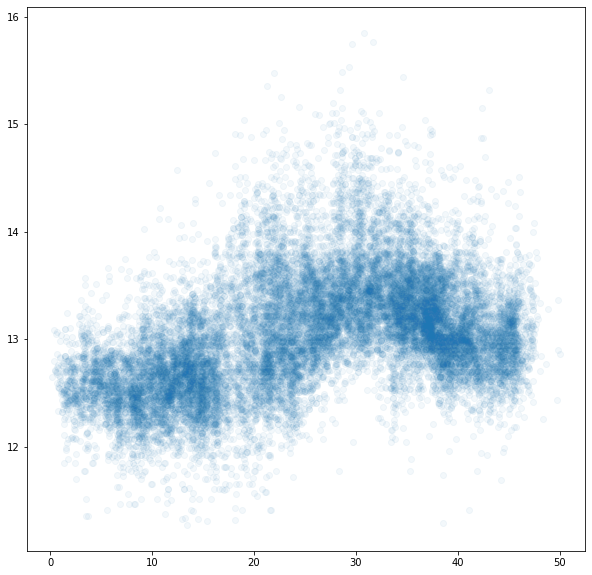

In [27]:
# concentrating on houses < 50 km
data_filtered = data[data['distance_from_amazon'] < 50]

plt.figure(figsize=(10,10))
plt.scatter(x = data_filtered['distance_from_amazon'], y = data_filtered['price_log'], alpha = 0.05)
plt.show()

In [35]:
data['sqft_lot_log'] = np.log(data['sqft_lot'])

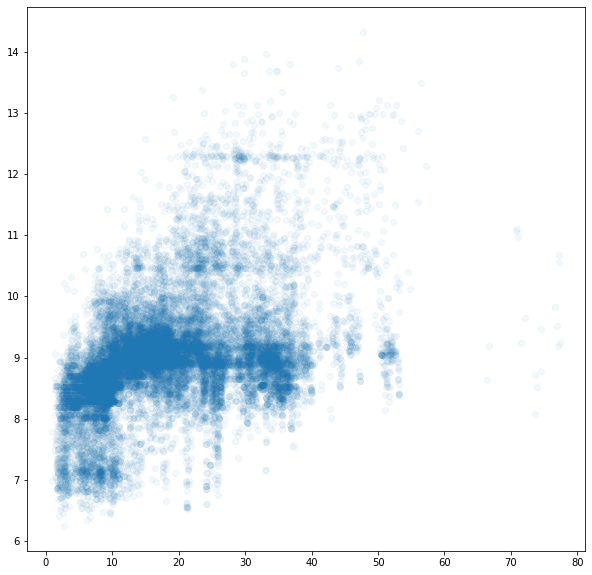

In [37]:
# let's see the lots

data_filtered = data[data['distance_from_center'] < 100]

plt.figure(figsize=(10,10))
plt.scatter(x = data_filtered['distance_from_center'], y = data_filtered['sqft_lot_log'], alpha = 0.05)
plt.show()

In [39]:
# now let's see all of this based on old-new buildings
# creating new variable, based on whether building was built before or after 1975

data['built_after_1975'] = data['yr_built'] > 1975
data_built_after_1975 = data[data['built_after_1975'] == True]
data_built_before_1975 = data[data['built_after_1975'] == False]

In [110]:
def draw_scatter_for_two_populations(data_1, data_2, var_x, var_y, label_1, label_2):

    """
     Draws two scatter plots from two different dataframes, using the same variables.
     Used to visualize the relationship of two variables in two subsets of the original data.
     """
    
    fig = plt.figure(figsize = (20,20))
    
    gridspec.GridSpec(3,2)
    
    #combined plot
     
    plt.subplot2grid((3,3), (1,0), colspan=2, rowspan=2) 

    plt.scatter(
        x = data_1[var_x], 
        y = data_1[var_y], 
        alpha = 0.1, color ='r', marker = '.')

    plt.scatter(None, None, color = 'r', label =label_1)

    plt.scatter(
        x = data_2[var_x], 
        y = data_2[var_y], 
        alpha = 0.1, color ='b', marker = '.')

    plt.scatter(None, None, color = 'b', label =label_2)
    
    plt.xlabel(var_x)
    plt.ylabel(var_y)
    
    plt.legend()
    
    # subplot 1
    plt.subplot2grid((3,3), (0,0))
    
    plt.scatter(
        x = data_1[var_x], 
        y = data_1[var_y], 
        alpha = 0.05, color ='r', marker = '.')
    
    plt.scatter(None, None, color = 'r', label =label_1)
    
    plt.xlabel(var_x)
    plt.ylabel(var_y)
    
    plt.legend()

    # subplot 2
    
    plt.subplot2grid((3,3), (0,1))
    
    plt.scatter(
        x = data_2[var_x], 
        y = data_2[var_y], 
        alpha = 0.05, color ='b', marker = '.')
    
    plt.scatter(None, None, color = 'b', label =label_2)
        
    plt.xlabel(var_x)
    plt.ylabel(var_y)
    
    plt.legend()
    
    plt.show()


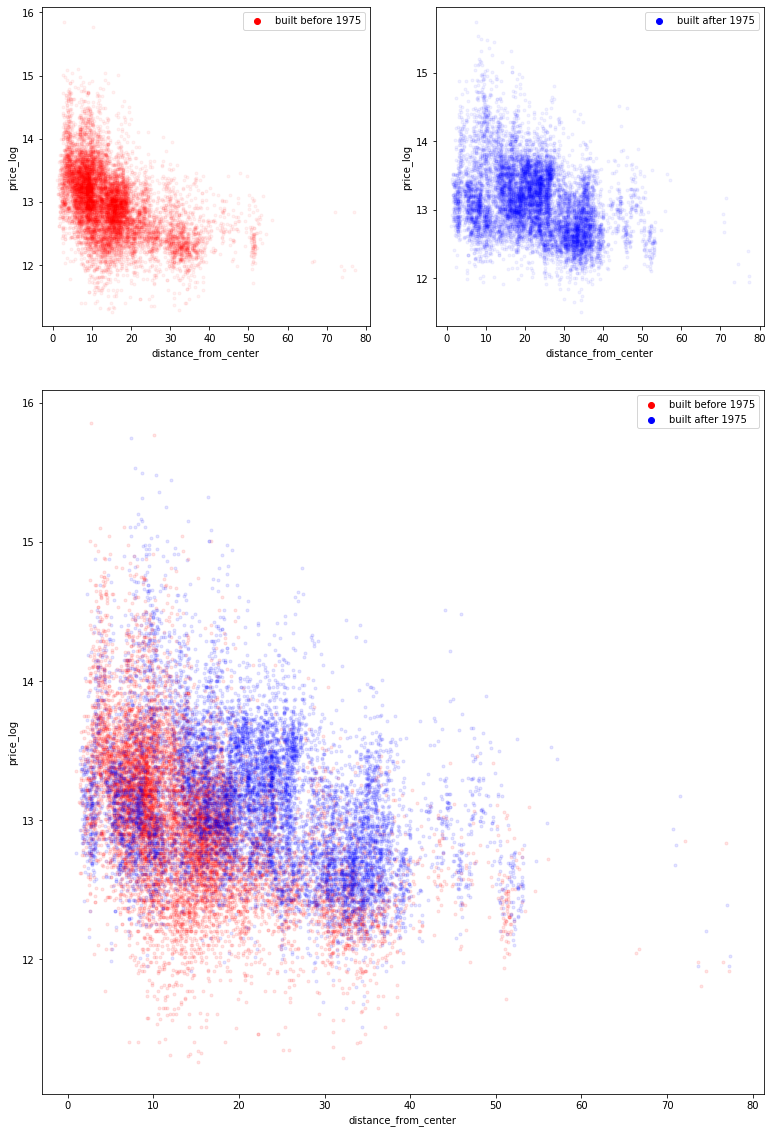

In [111]:
draw_scatter_for_two_populations(
    data_built_before_1975, data_built_after_1975, 
    'distance_from_center', 'price_log', 
    'built before 1975', 'built after 1975')

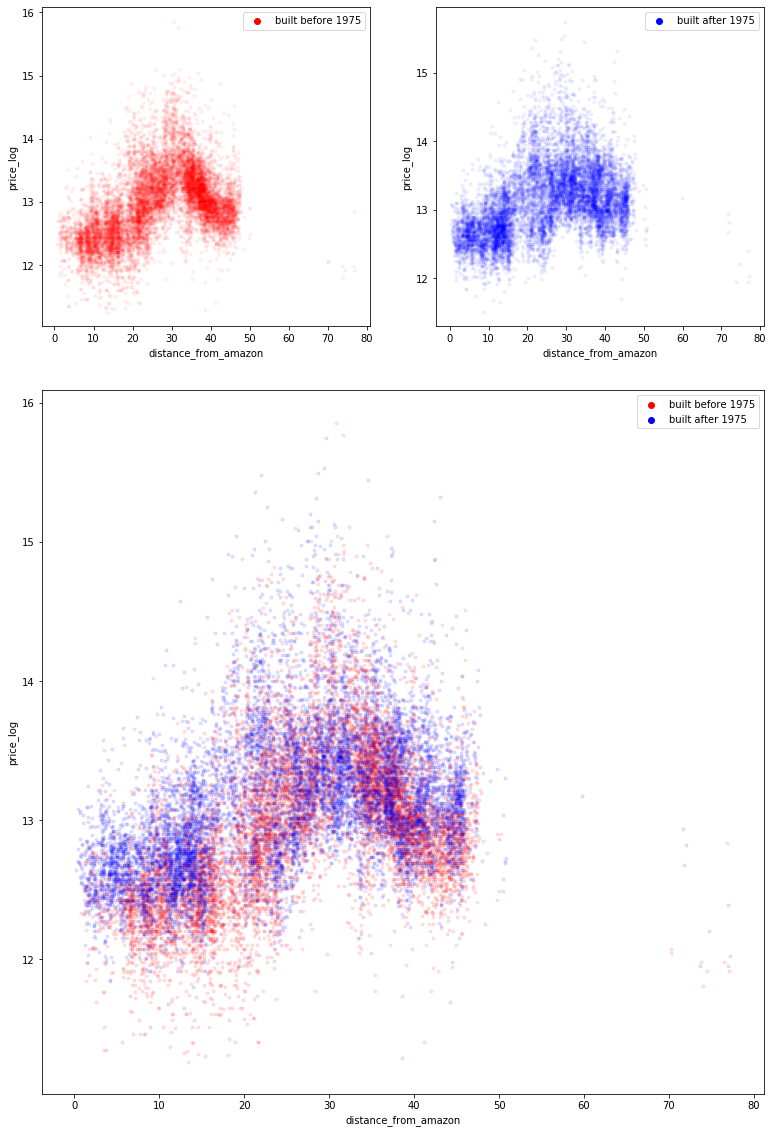

In [112]:
draw_scatter_for_two_populations(
    data_built_before_1975, data_built_after_1975, 
    'distance_from_amazon', 'price_log', 
    'built before 1975', 'built after 1975')

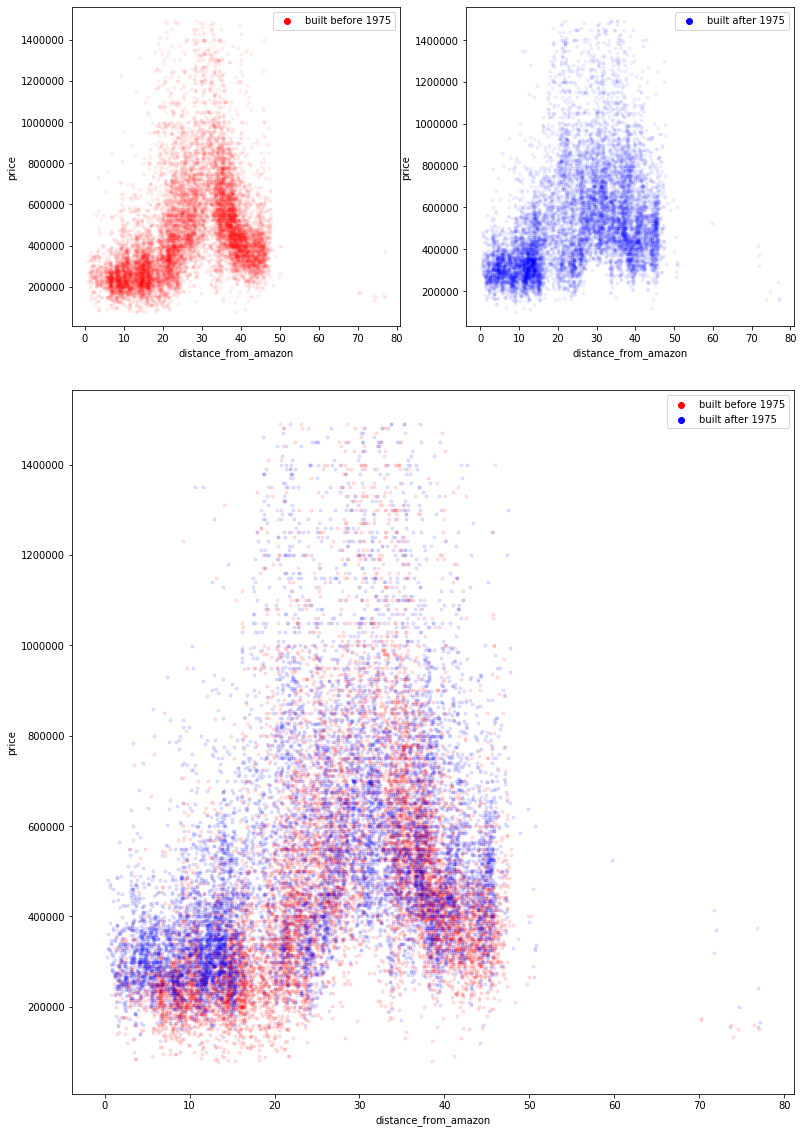

In [114]:
draw_scatter_for_two_populations(
    data_built_before_1975[data_built_before_1975['price']<1500000], 
    data_built_after_1975[data_built_after_1975['price'] < 1500000], 
    'distance_from_amazon', 'price', 
    'built before 1975', 'built after 1975')

Distance from Amazon HQ seems to have a strong connection with the price. This is especially clear for houses built before 1975. We can see that distance from Amazon HQ increases price up until about 30kms, and then there is a steady decrease. 
<br>
In the following, I am exploring if this can be reproduced with the bare lattitude or longitude variables - hopefully the distance is mostly driven by one of the variables. 

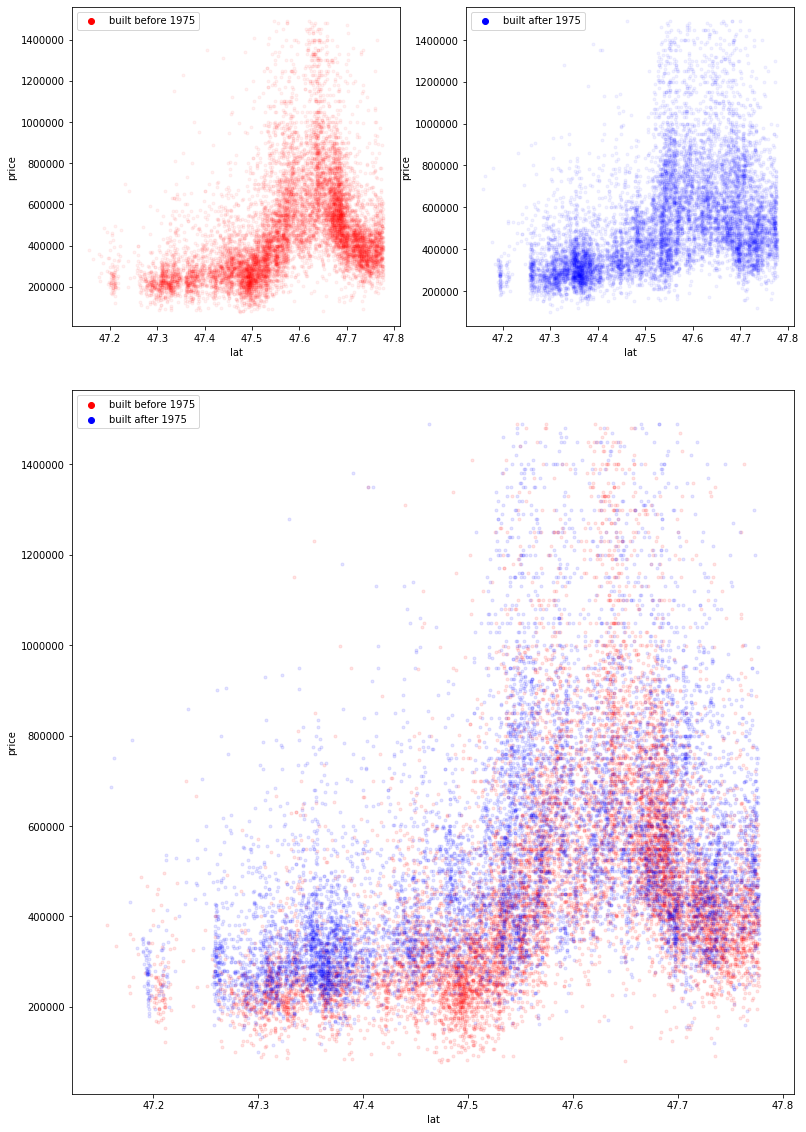

In [116]:
draw_scatter_for_two_populations(
    data_built_before_1975[data_built_before_1975['price']<1500000], 
    data_built_after_1975[data_built_after_1975['price'] < 1500000], 
    'lat', 'price', 
    'built before 1975', 'built after 1975')

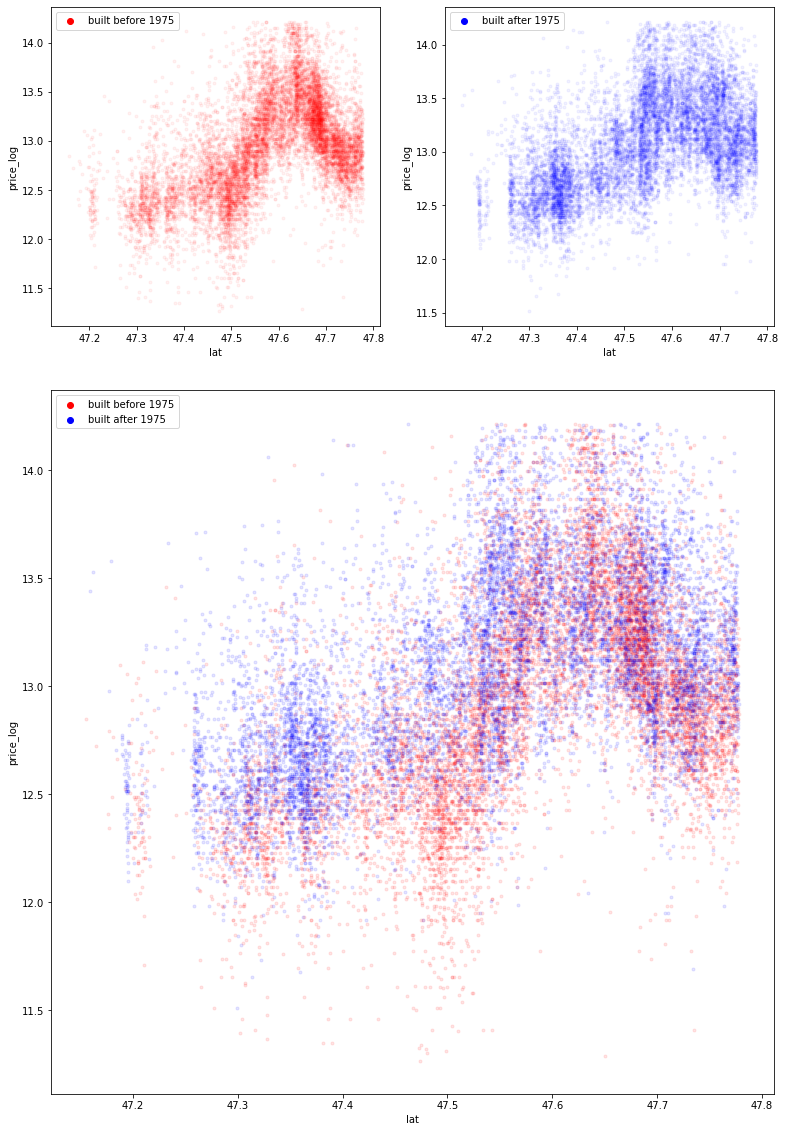

In [118]:
draw_scatter_for_two_populations(
    data_built_before_1975[data_built_before_1975['price']<1500000], 
    data_built_after_1975[data_built_after_1975['price'] < 1500000], 
    'lat', 'price_log', 
    'built before 1975', 'built after 1975')

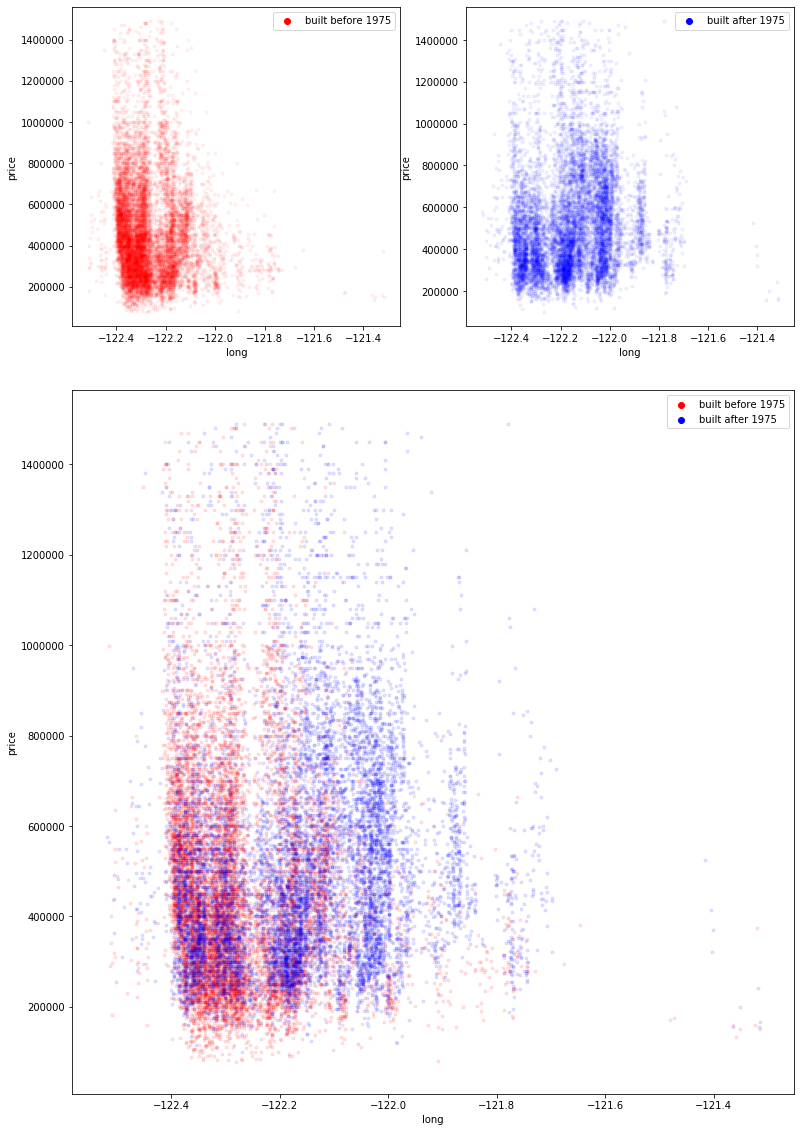

In [117]:
draw_scatter_for_two_populations(
    data_built_before_1975[data_built_before_1975['price']<1500000], 
    data_built_after_1975[data_built_after_1975['price'] < 1500000], 
    'long', 'price', 
    'built before 1975', 'built after 1975')

__Question Answer__: 
<br>
There seems to be a nonlinear connection between distances and prices, especially visible in houses built before 1975. 
<br>
Fortunately, we were able to replicate this behavior with only one of our geographical variables, the lattitude. Up until about 47.65, increasing lattitude increases log price, lattitude after about 47.65 decreases it. Question is, where is the breaking point exactly? Trying to answer this question in the following. 

In [125]:
print('Correlation between price_log and lat')
print('Full data: '+ str(data['price_log'].corr(data['lat'])))
print('Before 1975 only: '+ str(data_built_before_1975['price_log'].corr(data_built_before_1975['lat'])))
print('After 1975 only: '+ str(data_built_after_1975['price_log'].corr(data_built_after_1975['lat'])))

Correlation between price_log and lat
Full data: 0.4488369961691189
Before 1975 only: 0.4663634114402604
After 1975 only: 0.4843131615092877


In [144]:

def addRow(df,ls):
    """
    Given a dataframe and a list, append the list as a new row to the dataframe.

    :param df: <DataFrame> The original dataframe
    :param ls: <list> The new row to be added
    :return: <DataFrame> The dataframe with the newly appended row
    """

    numEl = len(ls)

    newRow = pd.DataFrame(np.array(ls).reshape(1,numEl), columns = list(df.columns))

    df = df.append(newRow, ignore_index=True)

    return df

In [154]:
# putting all the correlations in a dataframe so we can pick the splitting point

lattitude_split_df = pd.DataFrame(columns = [
        'latt_split',
        'Full data under latt_split', 'Full data above latt_split',
        'Built before 1975 under latt_split', 'Built before 1975 above latt_split',
        'Built after 1975 under latt_split', 'Built after 1975 above latt_split'
    ])

dataframe_row = [None] * len(lattitude_split_df.columns)

for lat_split_unrounded in np.arange(47.6, 47.7, 0.01):
    lat_split = round(lat_split_unrounded,2)
    
    # first column is simply the split
    dataframe_row[0] = lat_split
    
    # 2nd and 3rd columns are the full data correlations
    dataframe_row[1] = \
    data[data['lat'] < lat_split]['price_log'].corr(data[data['lat'] < lat_split]['lat'])
    
    dataframe_row[2] = \
    data[data['lat'] >= lat_split]['price_log'].corr(data[data['lat'] >= lat_split]['lat'])

    # 4th and 5th columns: same, but with the before 1975 dataframe

    dataframe_row[3] = \
    data_built_before_1975[data_built_before_1975['lat'] < lat_split]['price_log'].corr(
        data_built_before_1975[data_built_before_1975['lat'] < lat_split]['lat'])
    
    dataframe_row[4] = \
    data_built_before_1975[data_built_before_1975['lat'] >= lat_split]['price_log'].corr(
        data_built_before_1975[data_built_before_1975['lat'] >= lat_split]['lat'])
    
    # 6th and 7th columns: same, but with the after 1975 dataframe
    
    dataframe_row[5] = \
    data_built_after_1975[data_built_after_1975['lat'] < lat_split]['price_log'].corr(
        data_built_after_1975[data_built_after_1975['lat'] < lat_split]['lat'])
    
    dataframe_row[6] = \
    data_built_after_1975[data_built_after_1975['lat'] >= lat_split]['price_log'].corr(
        data_built_after_1975[data_built_after_1975['lat'] >= lat_split]['lat'])
    
    lattitude_split_df = addRow(lattitude_split_df, dataframe_row)


lattitude_split_df

,latt_split,Full data under latt_split,Full data above latt_split,Built before 1975 under latt_split,Built before 1975 above latt_split,Built after 1975 under latt_split,Built after 1975 above latt_split
0,47.60,0.505772,-0.419387,0.506855,-0.514224,0.599820,-0.315481
1,47.61,0.516852,-0.442645,0.522642,-0.550720,0.605134,-0.321051
2,47.62,0.531503,-0.453768,0.543844,-0.565223,0.608832,-0.329696
3,47.63,0.552536,-0.443786,0.571668,-0.561420,0.616341,-0.316423
4,47.64,0.578752,-0.397781,0.609189,-0.519380,0.624848,-0.275201
5,47.65,0.591535,-0.355462,0.627082,-0.479498,0.628955,-0.239140
6,47.66,0.595458,-0.336165,0.634678,-0.457642,0.626267,-0.231865
7,47.67,0.599880,-0.296790,0.640727,-0.420553,0.626457,-0.194914
8,47.68,0.598732,-0.247203,0.642236,-0.351420,0.620958,-0.166367
9,47.69,0.593180,-0.159461,0.635475,-0.216448,0.616877,-0.094580


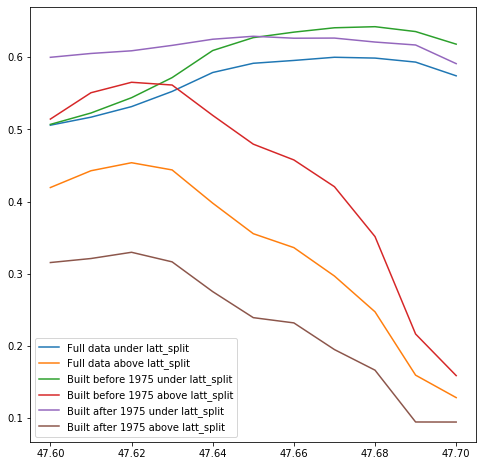

In [171]:
# quick visualization below, I am showing the absolute correlations for the negative ones

plt.figure(figsize = (8,8))

plt.plot(
    lattitude_split_df['latt_split'],lattitude_split_df['Full data under latt_split'] , 
    label = 'Full data under latt_split')

plt.plot(
    lattitude_split_df['latt_split'],np.abs(lattitude_split_df['Full data above latt_split']) , 
    label = 'Full data above latt_split')

plt.plot(
    lattitude_split_df['latt_split'],lattitude_split_df['Built before 1975 under latt_split'] , 
    label = 'Built before 1975 under latt_split')

plt.plot(
    lattitude_split_df['latt_split'],np.abs(lattitude_split_df['Built before 1975 above latt_split']) , 
    label = 'Built before 1975 above latt_split')

plt.plot(
    lattitude_split_df['latt_split'],lattitude_split_df['Built after 1975 under latt_split'] , 
    label = 'Built after 1975 under latt_split')

plt.plot(
    lattitude_split_df['latt_split'],np.abs(lattitude_split_df['Built after 1975 above latt_split']) , 
    label = 'Built after 1975 above latt_split')

plt.legend()

__Conclusion__: 
<br>
There is not that much increase for the under latt_split part, but the above part's correlation decreases rapidly. Based on the chart above, I think we should pick __47.62__ as the lattitude to split the data by. In the main jpynb file, I am going to calculate an absolute latt diff from 47.62. 